Data cleaning, exploration and preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

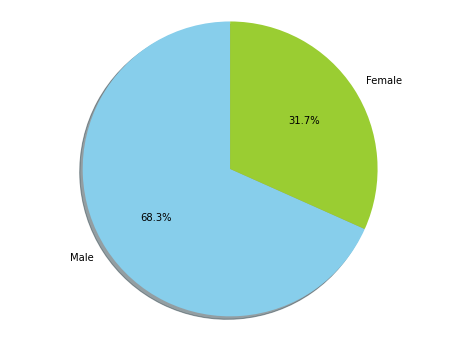

In [ ]:
#Sex percent that have heart disease
male =len(data[data['sex'] == 1])
female = len(data[data['sex']== 0])
plt.figure(figsize=(8,6))
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

(14.5, -0.5)

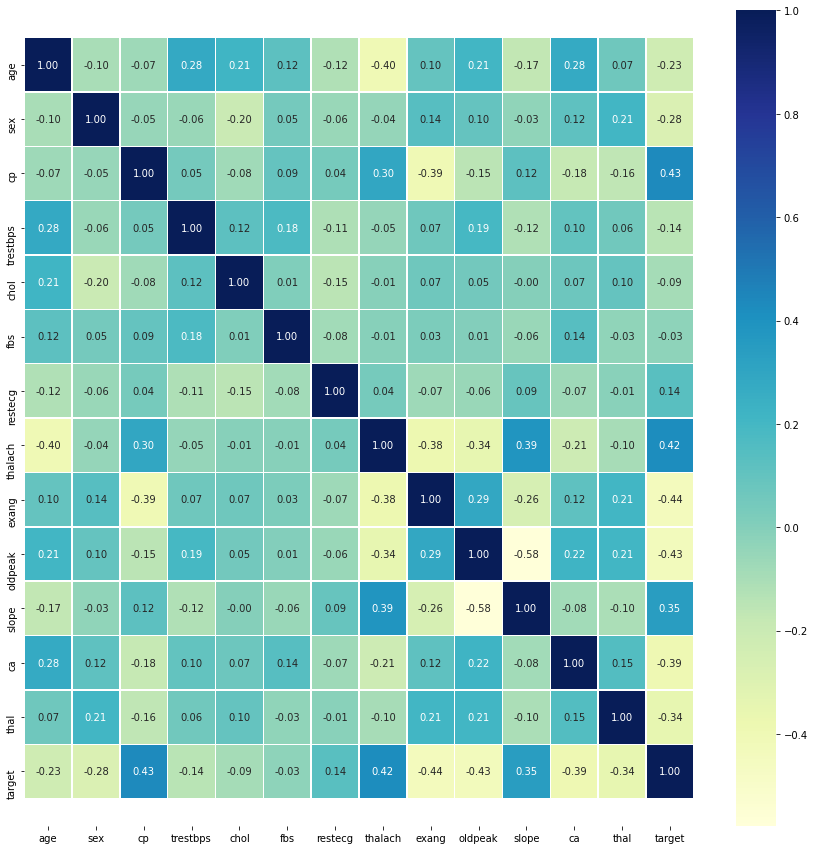

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

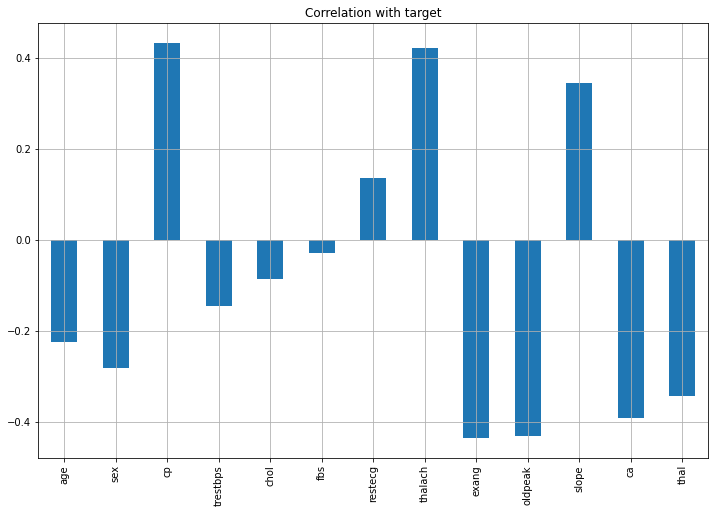

In [ ]:
#Correlation with target
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [ ]:
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [ ]:
print(categorical_val)
print(continous_val )

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [ ]:
categorical_val.remove("target")
dataset = pd.get_dummies(data, columns = categorical_val)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
#Spliting our data
X = dataset.drop('target', axis=1)
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Applying machine learning algorithms


In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test):
    target_names = ['class 0', 'class 1']
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred, target_names=target_names, output_dict=True))
    print("Train Result:\n*********************************************")
    print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
#Liste to keep our results 
result_acc = []

LogisticRegression

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
result_acc.append(accuracy_score(y_test,pred )*100)
print_score(lr_clf, X_train, y_train, X_test, y_test)

Train Result:
*********************************************
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
             class 0    class 1  accuracy  macro avg  weighted avg
precision   0.868421   0.849057  0.857143   0.858739      0.857781
recall      0.804878   0.900000  0.857143   0.852439      0.857143
f1-score    0.835443   0.873786  0.857143   0.854615      0.856511
support    41.000000  50.000000  0.857143  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 5 45]]



In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)
result_acc.append(accuracy_score(y_test,pred )*100)
print_score(knn_clf, X_train, y_train, X_test, y_test)

Train Result:
*********************************************
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
             class 0  class 1  accuracy  macro avg  weighted avg
precision   0.853659     0.88  0.868132   0.866829      0.868132
recall      0.853659     0.88  0.868132   0.866829      0.868132
f1-score    0.853659     0.88  0.868132   0.866829      0.868132
support    41.000000    50.00  0.868132  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



In [ ]:
tree_clf = DecisionTreeClassifier(random_state=20)
tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)
result_acc.append(accuracy_score(y_test,pred )*100)
print_score(tree_clf, X_train, y_train, X_test, y_test)

Train Result:
*********************************************
Accuracy Score: 73.63%
_______________________________________________
CLASSIFICATION REPORT:
             class 0    class 1  accuracy  macro avg  weighted avg
precision   0.688889   0.782609  0.736264   0.735749      0.740383
recall      0.756098   0.720000  0.736264   0.738049      0.736264
f1-score    0.720930   0.750000  0.736264   0.735465      0.736903
support    41.000000  50.000000  0.736264  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[31 10]
 [14 36]]



In [ ]:
rf_clf = RandomForestClassifier(random_state=20)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
result_acc.append(accuracy_score(y_test,pred )*100)
print_score(rf_clf, X_train, y_train, X_test, y_test)

Train Result:
*********************************************
Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
             class 0    class 1  accuracy  macro avg  weighted avg
precision   0.825000   0.843137  0.835165   0.834069      0.834966
recall      0.804878   0.860000  0.835165   0.832439      0.835165
f1-score    0.814815   0.851485  0.835165   0.833150      0.834963
support    41.000000  50.000000  0.835165  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 7 43]]



In [ ]:
svm_clf = SVC(random_state=2)
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
result_acc.append(accuracy_score(y_test,pred )*100)
print_score(svm_clf, X_train, y_train, X_test, y_test)

Train Result:
*********************************************
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
             class 0    class 1  accuracy  macro avg  weighted avg
precision   0.857143   0.897959  0.879121   0.877551      0.879569
recall      0.878049   0.880000  0.879121   0.879024      0.879121
f1-score    0.867470   0.888889  0.879121   0.878179      0.879239
support    41.000000  50.000000  0.879121  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[36  5]
 [ 6 44]]



In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Decision Tree','Random Forest'
                    ,'Support Vector Machine'], 'Accuracy': result_acc})
model_ev

,Model,Accuracy
0,Logistic Regression,85.714286
1,K-Nearest Neighbour,86.813187
2,Decision Tree,73.626374
3,Random Forest,83.516484
4,Support Vector Machine,87.912088


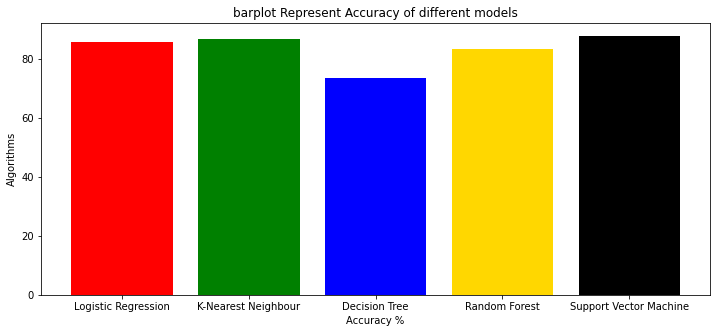

In [ ]:
colors = ['red','green','blue','gold','black']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

**Hyperparameter Tunning**

---




In [ ]:
#Logistic Regression
params = {"C": np.logspace(-4, 4, 20),
          "solver": ['liblinear']}
lr_clf = LogisticRegression()
lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test)

NameError: ignored

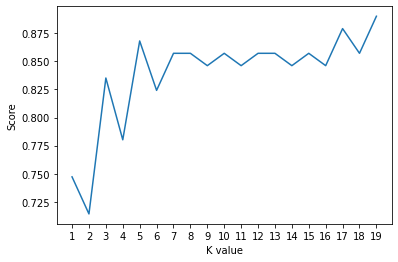

Maximum KNN Score is 89.01%


In [ ]:
#KNN try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [ ]:
#Random Forest
params = [{'max_depth': np.arange(1, 10),
               'min_samples_split': np.arange(2, 5),
               'n_estimators': np.arange(10, 20)}]
rf_clf = RandomForestClassifier(random_state=19)
rf_cv = GridSearchCV(rf_clf, params, scoring='accuracy')
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f'Best_params: {best_params}')
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test)

Best_params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 15}
Train Result:
*********************************************
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
             class 0    class 1  accuracy  macro avg  weighted avg
precision   0.846154   0.846154  0.846154   0.846154      0.846154
recall      0.804878   0.880000  0.846154   0.842439      0.846154
f1-score    0.825000   0.862745  0.846154   0.843873      0.845739
support    41.000000  50.000000  0.846154  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 6 44]]



In [ ]:
#decision Tree
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   18.1s


Best_params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
*********************************************
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
             class 0  class 1  accuracy  macro avg  weighted avg
precision   0.804878     0.84  0.824176   0.822439      0.824176
recall      0.804878     0.84  0.824176   0.822439      0.824176
f1-score    0.804878     0.84  0.824176   0.822439      0.824176
support    41.000000    50.00  0.824176  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   40.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [ ]:
#
params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}
svm_clf = SVC()
svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=3, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 147 candidates, totalling 441 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Train Result:
*********************************************
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
             class 0    class 1  accuracy  macro avg  weighted avg
precision   0.857143   0.897959  0.879121   0.877551      0.879569
recall      0.878049   0.880000  0.879121   0.879024      0.879121
f1-score    0.867470   0.888889  0.879121   0.878179      0.879239
support    41.000000  50.000000  0.879121  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[36  5]
 [ 6 44]]



[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    2.2s finished
